In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

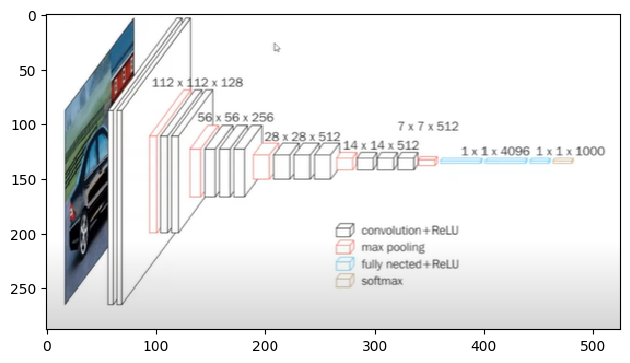

In [ ]:
from skimage import io

img = io.imread("/content/Screenshot 2023-04-28 103415.png")
io.imshow(img)

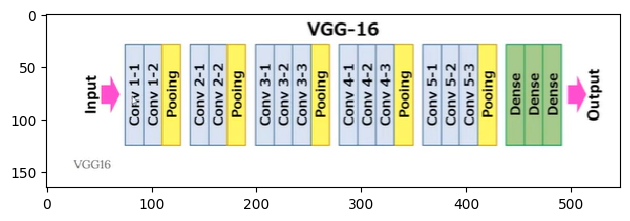

In [ ]:
from skimage import io

img = io.imread("/content/Screenshot 2023-04-28 103920.png")
io.imshow(img)

In [ ]:
IMAGE_SIZE = [256, 256]

In [ ]:
train_path = '/content/drive/MyDrive/archive (1)/Multi-class Weather Dataset'
test_path = '/content/drive/MyDrive/archive (1)/validation'

Sunrise


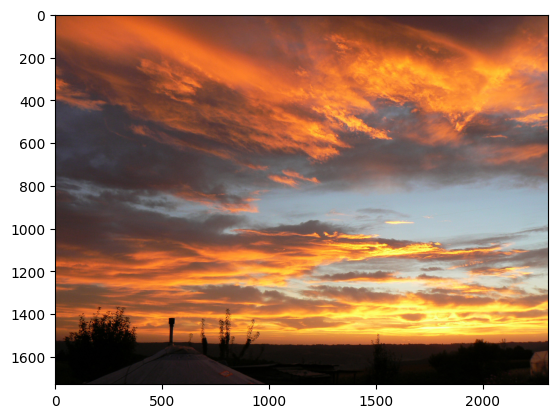

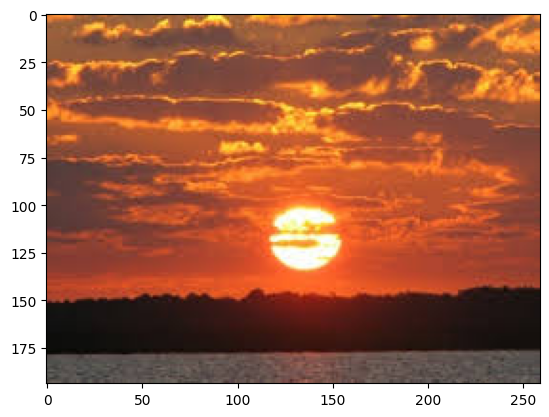

Cloudy


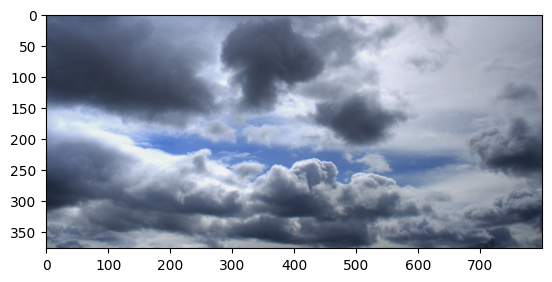

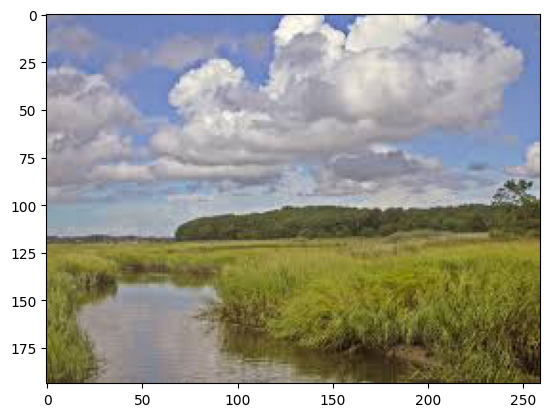

Shine


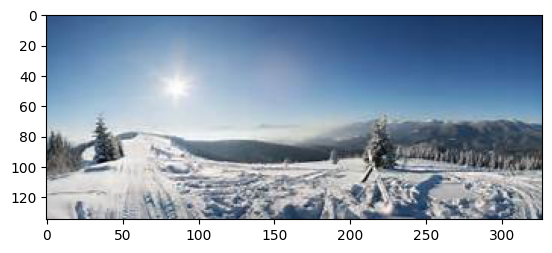

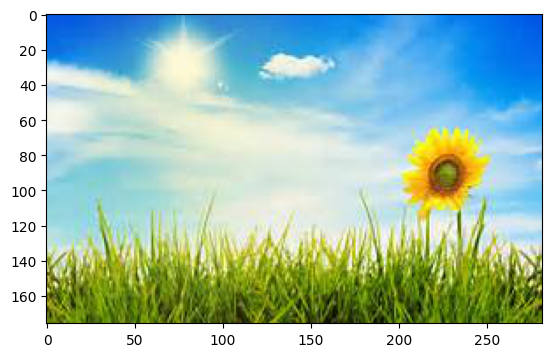

Rain


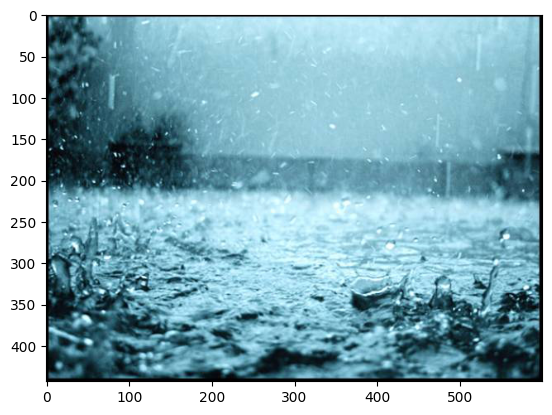

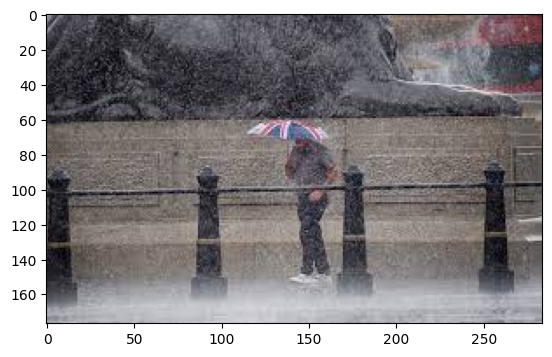

In [ ]:
import os
import matplotlib.image as mpimg
for folder in os.listdir(train_path):
    sub_path = train_path + "/" + folder

    print(folder)
    for i in range(2):
        temp_path = os.listdir(sub_path)[i]
        temp_path = sub_path + "/" + temp_path
        img = mpimg.imread(temp_path)
        imgplot = plt.imshow(img)
        plt.show()

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg.input

<KerasTensor: shape=(None, 256, 256, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
for layer in vgg.layers:
  layer.trainable = False


In [ ]:
folders = glob('/content/drive/MyDrive/archive (1)/Multi-class Weather Dataset/*')
print(len(folders))

4


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 1004 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 140 images belonging to 4 classes.


In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5',
                               verbose=1, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit(
  train_set,
  validation_data=test_set,
  epochs=4,
  steps_per_epoch=15,
  # validation_steps=32,
    callbacks=callbacks ,verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/4
15/15 [==============================] - ETA: 0s - loss: 0.3069 - accuracy: 0.9652
Epoch 1: val_loss improved from inf to 0.50022, saving model to mymodel.h5
15/15 [==============================] - 15s 1s/step - loss: 0.3069 - accuracy: 0.9652 - val_loss: 0.5002 - val_accuracy: 0.9357
Epoch 2/4
15/15 [==============================] - ETA: 0s - loss: 0.2801 - accuracy: 0.9696
Epoch 2: val_loss improved from 0.50022 to 0.45516, saving model to mymodel.h5
15/15 [==============================] - 16s 1s/step - loss: 0.2801 - accuracy: 0.9696 - val_loss: 0.4552 - val_accuracy: 0.9429
Epoch 3/4
15/15 [==============================] - ETA: 0s - loss: 0.3058 - accuracy: 0.9587
Epoch 3: val_loss did not improve from 0.45516
15/15 [==============================] - 14s 955ms/step - loss: 0.3058 - accuracy: 0.9587 - val_loss: 0.5969 - val_accuracy: 0.9357
Epoch 4/4
15/15 [==============================] - ETA: 0s - loss: 0.2948 - accuracy: 0.9708
Epoch 4: val_loss improved from 0.455

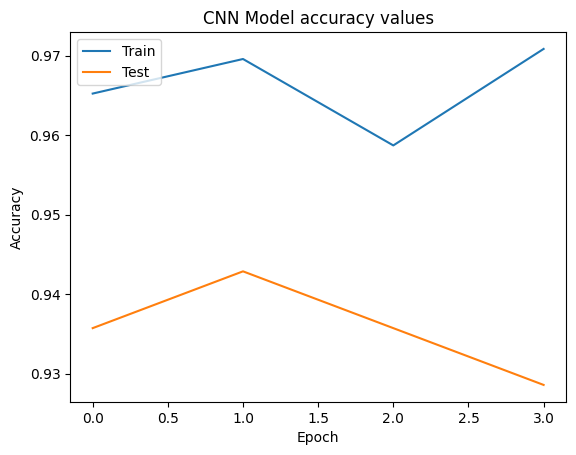

In [ ]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

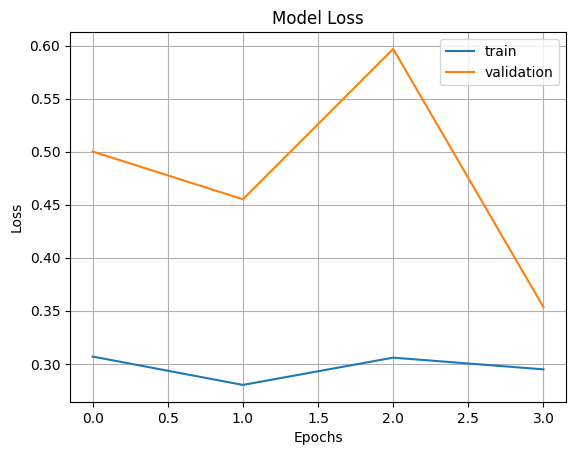

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
train_set.class_indices

{'Cloudy': 0, 'Rain': 1, 'Shine': 2, 'Sunrise': 3}

In [ ]:
ref = dict(zip(list(train_set.class_indices.values()), list(train_set.class_indices.keys())))

In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

In [ ]:
def prediction(path):
  img = load_img(path , target_size = (256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im , axis = 0)
  pred = np.argmax(model.predict(img))
  print(f"this image belongs to {ref[pred]} ")

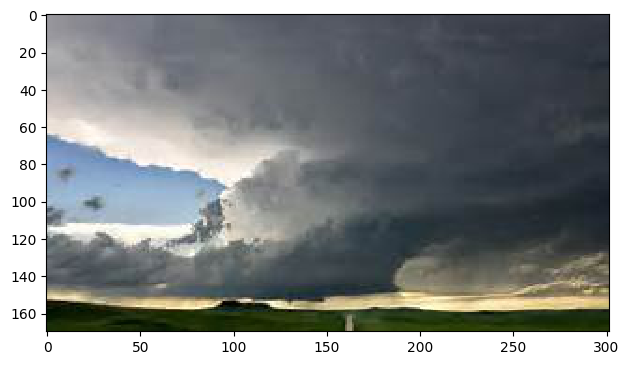

In [ ]:
from skimage import io
#image of early blight potato leaf disease
img = io.imread("/content/drive/MyDrive/archive (1)/New/cloudy183.jpg")
io.imshow(img)

In [ ]:
path = "/content/drive/MyDrive/archive (1)/New/cloudy183.jpg"
prediction(path)

1/1 [==============================] - 1s 708ms/step
this image belongs to Cloudy 


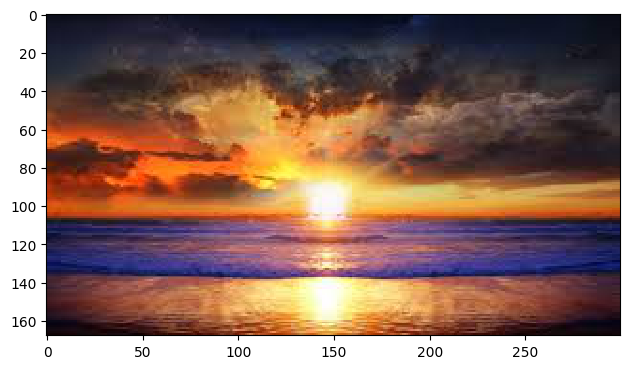

In [ ]:
from skimage import io
#image of early blight potato leaf disease
img = io.imread("/content/drive/MyDrive/archive (1)/New/sunrise173.jpg")
io.imshow(img)

In [ ]:
path = "/content/drive/MyDrive/archive (1)/New/sunrise173.jpg"
prediction(path)

1/1 [==============================] - 0s 29ms/step
this image belongs to Sunrise 


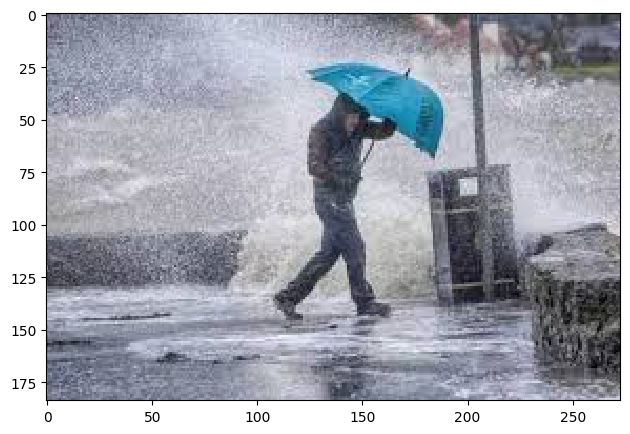

In [ ]:
from skimage import io
#image of early blight potato leaf disease
img = io.imread("/content/drive/MyDrive/archive (1)/New/rain168.jpg")
io.imshow(img)

In [ ]:
path = "/content/drive/MyDrive/archive (1)/New/rain168.jpg"
prediction(path)


1/1 [==============================] - 0s 19ms/step
this image belongs to Rain 
